## Submission 1

For this submission, complete the following tasks(use the data in the "GWP_PTAP_Data.xlsx" spreadsheet provided in the course room)

1. Calculate the expected return in the upcoming year. Use the Capital Asset Pricing Model ad the following information:

|  | XLE | XLI |
| --- | --- | --- |
| Beta | 1.07 | 1.06 |

- Risk-free rate of return ($ R_f $): &emsp; 2.25%
- Market return ($ R_m $): &emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp; 9%
- Market standard deviation: &emsp;&ensp;&nbsp; 15%

Calculate the daily and annualized standard deviation of returns for the prior year. Use the MS Excel spreadsheet provided titled "GWP_PTAP_Data.xlsx". When annualizing daily standard deviation, assume there are 252 trading days in a year.

2. Calculate the correlation (to two (2) decimal places) between each sector's return.

<b>Explain the calculations required to accomplish each task</b>

# Answer

<b> We convert the data from the Excel files ("GWP_PTAP_Data_2010.10.08.xlsx"), sheets XLE and XLI to two separate files ("XLE.csv" and "XLI.csv") 
    for this assignment </b> 

In [44]:
# import library
# In this assignment, we will use Pandas and Numpy.
# Note that since in our course we haven't learnt Pandas yet, so using Pandas in this assignment
# only for Data Management and Data Viewer

import pandas as pd
import numpy as np

In [45]:
# Import the CSV data files we separate as we state above

XLE = pd.read_csv("Data/XLE.csv",
                    delimiter=',')
XLE['Date'] = pd.to_datetime(XLE['Date'])
XLE.set_index('Date', inplace=True)

XLI = pd.read_csv("Data/XLI.csv",
                    delimiter=',')
XLI['Date'] = pd.to_datetime(XLI['Date'])
XLI.set_index('Date', inplace=True)

In [46]:
# Check the data import 

XLE.head()

# Head of XLE data

,Closing_price
Date,
2017-11-27,67.19
2017-11-28,67.71
2017-11-29,68.08
2017-11-30,69.10
2017-12-01,69.68


In [47]:
# Check the data import

XLI.head()

# Head of XLI data

,Closing_price
Date,
2017-11-27,71.53
2017-11-28,72.62
2017-11-29,73.26
2017-11-30,74.51
2017-12-01,73.59


### 1. Calculate the expected return in the upcoming year by using Capital Asset Pricing Model (CAPM): 
- Calculate the cost of equity, or expected return in the next year, by Capital Asset Pricing Model (CAPM):

$$ E(R_i) = R_f + \beta_i*(R_m - R_f) $$

which: <br>
$ E(R_i) $ is the expected return, or cost of equity<br>
$ R_f $ is the Risk-free rate of return <br>
$ R_m $ is the market return

In [48]:
# Import the return information

beta_XLE = 1.07
beta_XLI = 1.06

Rf = 2.25/100
Rm = 9/100
sigma_market = 15/100

In [49]:
# Function to calculate Expected Return by CAPM

def E_Rp_CAPM(Rf, beta, Rm):
    result = Rf + beta * (Rm - Rf)
    return result

In [50]:
# Calculate the Expected Return in the next year

return_XLE = E_Rp_CAPM(Rf, beta_XLE, Rm)
return_XLI = E_Rp_CAPM(Rf, beta_XLI, Rm)

print("The Expected Return in the next year calculate by CAPM of XLE is: {0:.4f}".format(return_XLE))
print("The Expected Return in the next year calculate by CAPM of XLI is: {0:.4f}".format(return_XLI))

The Expected Return in the next year calculate by CAPM of XLE is: 0.0947
The Expected Return in the next year calculate by CAPM of XLI is: 0.0940


### Calculate the daily and annualized standard deviation of returns for the prior year.

For the purpose of this assignment, we will use the normal daily return for calculation. The formula for Normal Daily Return:

$$ Normal Daily Return = \frac{Current Price - Previous Price}{Previous Price} $$

In [51]:
# Calculate daily return for both stocks

XLE["Daily_Return"] = (XLE['Closing_price'].diff())/XLE["Closing_price"].shift(1)
XLI["Daily_Return"] = (XLI['Closing_price'].diff())/XLI["Closing_price"].shift(1)

# Drop the NA data in case data missing
XLE.dropna(inplace=True)
XLI.dropna(inplace=True)

In [52]:
# View XLE
XLE.head()

,Closing_price,Daily_Return
Date,,
2017-11-28,67.71,0.007739
2017-11-29,68.08,0.005464
2017-11-30,69.10,0.014982
2017-12-01,69.68,0.008394
2017-12-04,69.65,-0.000431


In [53]:
# View XLI
XLI.head()

,Closing_price,Daily_Return
Date,,
2017-11-28,72.62,0.015238
2017-11-29,73.26,0.008813
2017-11-30,74.51,0.017063
2017-12-01,73.59,-0.012347
2017-12-04,74.21,0.008425


Calculate the daily standard deviation of return by applying the following formula:

$$ \sigma_{daily} = \sqrt{\frac{\sum_{n=0}^n r^2}{n}}$$

where:<br>
$\sigma_{daily}$: Standard Deviation<br>
$r$: Normal Daily Return

In [54]:
# Calculate daily standard deviation of return by using Numpy library
# This method have been used by lecture notes

daily_return_std_XLE = np.std(XLE['Daily_Return'])
daily_return_std_XLI = np.std(XLI['Daily_Return'])

print("The Daily Standard Deviation of Daily Return of XLE is: {0:.4f}".format(daily_return_std_XLE))
print("The Daily Standard Deviation of Daily Return of XLI is: {0:.4f}".format(daily_return_std_XLI))

The Daily Standard Deviation of Daily Return of XLE is: 0.0127
The Daily Standard Deviation of Daily Return of XLI is: 0.0107


Calculate the Annualized standard deviation of return by applying the following formula (assume there are 252 trading days in a year):

$$ \sigma_{annualized} = \sigma_{daily} * \sqrt{252} $$

In [55]:
annualized_return_std_XLE = daily_return_std_XLE * np.sqrt(252)
annualized_return_std_XLI = daily_return_std_XLI * np.sqrt(252)

print("The Annualized Standard Deviation of Daily Return of XLE is: {0:.4f}".format(annualized_return_std_XLE))
print("The Annualized Standard Deviation of Daily Return of XLI is: {0:.4f}".format(annualized_return_std_XLI))

The Annualized Standard Deviation of Daily Return of XLE is: 0.2019
The Annualized Standard Deviation of Daily Return of XLI is: 0.1699


### 2. Calculate the correlation (to two (2) decimal places) between each sector's return.

We use the following formula to calculate the Pearson product-moment correlation coefficient:

$$ \rho_{xy} = \frac{Cov(x,y)}{\sigma_x * \sigma_y} $$

where: <br>
$ \rho_{xy} $: Pearson product-moment correlation coefficient <br>
$ Cov(x,y) $: covariance of variables x and y <br>
$ \sigma_x, \sigma_y $: standard deviation of x and y <br>

And covariance will be calculate by:

$$ Cov(x,y) = \frac{\sum (X_i - \overline{X}) * (Y_i - \overline{Y})}{n} $$

Since in the lecture we use Numpy as our library, we will use Numpy to calculate the correlation coefficient matrix, then take the Pearson product-moment correlation coefficient:

In [56]:
correlation_XLE_XLI = np.corrcoef(XLE['Daily_Return'],
                                      XLI['Daily_Return'])[0][1]
print("The Correlation Coefficient of Daily Return of XLE and XLI is: {0:.2f}".format(correlation_XLE_XLI))

The Correlation Coefficient of Daily Return of XLE and XLI is: 0.66


In [57]:
## Submission 2
### a) Calculate and draw a scatter plot graph of the efficient frontier based on 11 combinations of XLE and XLI

In [58]:
import matplotlib.pyplot as plt

In [59]:
xle_percent = np.linspace(100, 0, 11)
xli_percent = np.linspace(0, 100, 11)
index = ["Portfolio 1", "Portfolio 2", "Portfolio 3", "Portfolio 4", "Portfolio 5", "Portfolio 6", "Portfolio 7", "Portfolio 8", "Portfolio 9", "Portfolio 10", "Portfolio 11",]
portfolios = pd.DataFrame(index=index, columns=["XLE %", "XLI %", "Expected Return", "Std. Volatility"])
portfolios["XLE %"] = xle_percent
portfolios["XLI %"] = xli_percent
portfolios.fillna(0, inplace=True)

In [60]:
portfolios["Expected Return"] = return_XLE*portfolios["XLE %"]/100 + return_XLI*portfolios["XLI %"]/100
portfolios["Std. Volatility"] = np.sqrt((annualized_return_std_XLE**2)*(portfolios["XLE %"]/100)**2 + (annualized_return_std_XLI**2)*(portfolios["XLI %"]/100)**2 + 2*annualized_return_std_XLE*annualized_return_std_XLI*(portfolios["XLE %"]/100)*(portfolios["XLI %"]/100)*correlation_XLE_XLI)

portfolios

,XLE %,XLI %,Expected Return,Std. Volatility
Portfolio 1,100.0,0.0,0.094725,0.201857
Portfolio 2,90.0,10.0,0.094657,0.193282
Portfolio 3,80.0,20.0,0.094590,0.185632
Portfolio 4,70.0,30.0,0.094523,0.179023
Portfolio 5,60.0,40.0,0.094455,0.173576
Portfolio 6,50.0,50.0,0.094387,0.169402
Portfolio 7,40.0,60.0,0.094320,0.166598
Portfolio 8,30.0,70.0,0.094253,0.165233
Portfolio 9,20.0,80.0,0.094185,0.165342
Portfolio 10,10.0,90.0,0.094117,0.166923


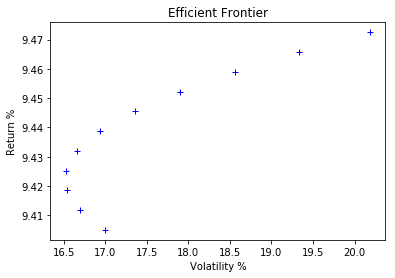

In [61]:
plt.plot(portfolios["Std. Volatility"]*100, portfolios["Expected Return"]*100, 'b+')
plt.title("Efficient Frontier")
plt.ylabel("Return %")
plt.xlabel("Volatility %")
plt.show()

### b) Select a portfolio from portfolios 1-11 on the efficient frontier that has the return > 9.43% and volatility <= 16.8%

In [62]:
return_threshold = 0.0943
volatility_threshold = 0.168
optimal_portfolio = portfolios.loc[(portfolios["Expected Return"] > return_threshold) & (portfolios["Std. Volatility"] <= volatility_threshold)]

print(f"{optimal_portfolio.index.values} has expected return > {return_threshold} and Std. Volatility <= {volatility_threshold}")
optimal_portfolio

['Portfolio 7'] has expected return > 0.0943 and Std. Volatility <= 0.168


,XLE %,XLI %,Expected Return,Std. Volatility
Portfolio 7,40.0,60.0,0.09432,0.166598


### c)

## Submission 3

### Compute the price return for each SPDR and the S&P 500 for each month of 2017

In [65]:
import os

file_name = "GWP_PTAP_Data_2010.10.08.xlsx"
file_dir = "./Data"
file = os.path.join(file_dir, file_name)
data_raw = pd.read_excel(file, sheet_name="10 SPDRs and S&P 500", header=1, index_col=0)
data_raw = data_raw.dropna()

data_raw.head()

,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE,S&P 500
Date,,,,,,,,,,,
2016-12-30,75.320000,49.700001,62.220001,81.400002,51.709999,68.940002,23.250000,48.360001,48.570000,30.750000,2238.830078
2017-01-31,72.900002,51.959999,63.380001,84.830002,52.590000,70.519997,23.309999,50.080002,49.180000,30.709999,2278.870117
2017-02-28,71.379997,52.250000,65.860001,86.370003,55.099998,74.989998,24.540001,52.349998,51.770000,32.139999,2363.639893
2017-03-31,69.900002,52.410000,65.059998,87.949997,54.580002,74.360001,23.730000,53.310001,51.310001,31.600000,2362.719971
2017-04-28,67.839996,53.070000,66.339996,90.059998,55.180000,75.500000,23.530001,54.380001,51.700001,31.650000,2384.199951


In [66]:
tickers = data_raw.columns
price_return = pd.DataFrame()

for ticker in tickers:
    price_return[ticker] = data_raw[ticker].diff()/data_raw[ticker].shift(1)

price_return = price_return.dropna()
price_return.head()

,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE,S&P 500
Date,,,,,,,,,,,
2017-01-31,-0.032130,0.045473,0.018644,0.042138,0.017018,0.022918,0.002581,0.035567,0.012559,-0.001301,0.017884
2017-02-28,-0.020851,0.005581,0.039129,0.018154,0.047728,0.063386,0.052767,0.045327,0.052664,0.046565,0.037198
2017-03-31,-0.020734,0.003062,-0.012147,0.018293,-0.009437,-0.008401,-0.033007,0.018338,-0.008885,-0.016801,-0.000389
2017-04-28,-0.029471,0.012593,0.019674,0.023991,0.010993,0.015331,-0.008428,0.020071,0.007601,0.001582,0.009091
2017-05-31,-0.035377,0.000188,0.017787,0.010993,0.026459,0.007682,-0.011900,0.039537,0.041393,0.006635,0.011576


### Compute the active return (relative to the S&P 500) for each SPDR for each month of 2017

In [68]:
ticker_benchmark = "S&P 500"
active_return = pd.DataFrame()

for ticker in tickers:
    if ticker == ticker_benchmark:
        continue
    active_return[ticker] = price_return[ticker] - price_return[ticker_benchmark]

active_return.head()

,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE
Date,,,,,,,,,,
2017-01-31,-0.050014,0.027588,0.000759,0.024253,-0.000866,0.005034,-0.015304,0.017682,-0.005325,-0.019185
2017-02-28,-0.058049,-0.031617,0.001931,-0.019044,0.010530,0.026188,0.015569,0.008129,0.015466,0.009366
2017-03-31,-0.020345,0.003451,-0.011758,0.018683,-0.009048,-0.008012,-0.032618,0.018727,-0.008496,-0.016412
2017-04-28,-0.038562,0.003502,0.010583,0.014900,0.001902,0.006240,-0.017519,0.010980,-0.001490,-0.007509
2017-05-31,-0.046954,-0.011388,0.006211,-0.000584,0.014883,-0.003894,-0.023476,0.027960,0.029816,-0.004941


### Calculate the tracking error and mean-adjusted tracking error for each SPDR in 2017

In [70]:
tracking_error = pd.DataFrame(index=["Tracking Error", "MATE"])

for ticker in tickers:
    if ticker == ticker_benchmark:
        continue
    tracking_error.loc["Tracking Error", ticker] = active_return[ticker].std()
    T = active_return[ticker].size
    tracking_error.loc["MATE", ticker] = np.sqrt(np.sum(active_return[ticker]**2)/T)

tracking_error.head()

,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XLU,XLRE
Tracking Error,0.038706,0.016058,0.010873,0.016878,0.020762,0.019164,0.024658,0.023002,0.033954,0.014863
MATE,0.041059,0.015468,0.010534,0.016220,0.020964,0.018356,0.023622,0.023751,0.033367,0.016859


### Identify the SPDR that best tracks the S&P 500 and explain how you came to this conclusion

#### Answer: Accroding to the tracking error table, XLI best tracks the S&P500 because it has lowest MATE